# An Introduction to Betfair API and How to Use It

In this notebook you will see how to gain access to the Betfair API. Before you start make sure you are able to access/place bets on Betfair. I also started trying to access the API on Google Colaboratory but was denied access as the servers are based in the US, a country that can't access Betfair.

### Gaining access to your API Keys
To begin you will need to have a Betfair account in order to gain access to the API key. To gain access to your API keys you will first need to have your SSOID and use the [APING Demo Tool](https://docs.developer.betfair.com/visualisers/api-ng-account-operations/). When logged in to Betfair right and select Inspect Element. On Chrome you are looking for the Applications tab and then Cookies. It should look similar to this.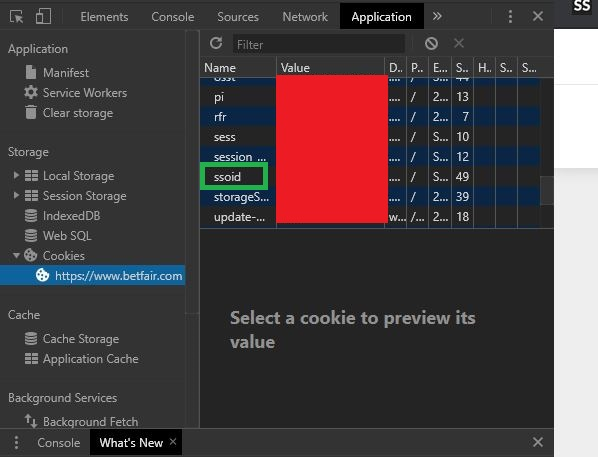 When you have your SSOID paste it into the APING Demo Tool and add an application name then press execute.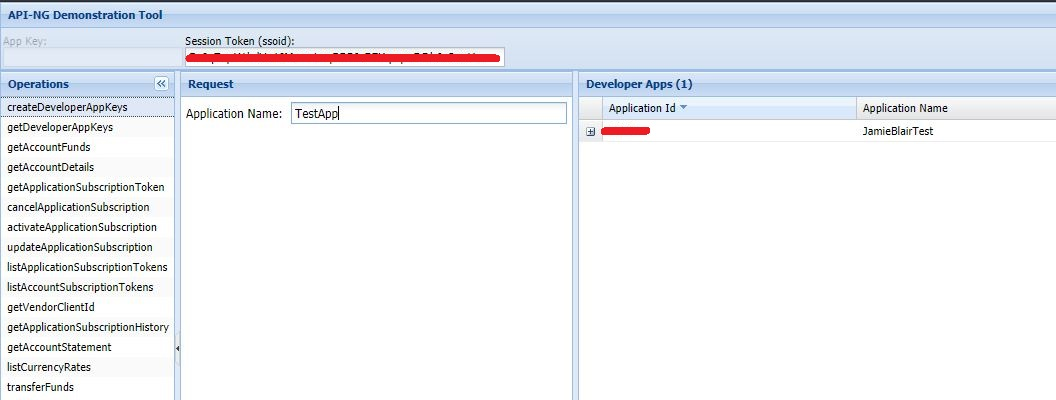 You should then have an app show up like this 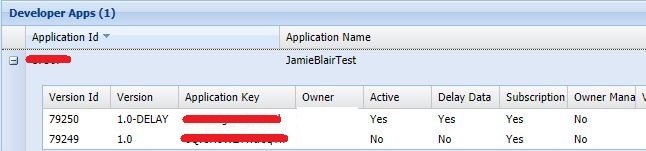 Notice that there are 2 keys. For this application we are using the Delayed key as this is free whereas the other has no delay and costs £200. If you want to use it just make sure you have that amount in your Betfair account as it will be deducted from there. If you have already created an App, then select the getDeveloperAppKeys button and press execute at the bottom and this should display the keys. 

### Time to get your certificate and key!
Now that you have access to your API Keys you will now need to download XCA. It is more beneficial to follow the guide for creating them [from here](https://docs.developer.betfair.com/display/1smk3cen4v3lu3yomq5qye0ni/Certificate+Generation+With+XCA). Make sure to double check all the information and settings are correct before advancing as these can't be changed and will have to be created again if they are wrong. When you have your certificate and key exported from XCA its time to upload the certificate to your Betfair account. This is done by going int to "My Betfair Account" then the "My Details" dropdown menu and selecting "Security Settings". On this page click "edit" next to the "Automated Betting Program Access" menu. Upload the .crt file and you should be ready to get into the programming. Throughout this example my key will have the extension .key this is because I changed it from .pem, either works as long as it is the correct extension in your code.

In [2]:
#Import the libraries that will be used
import json, datetime, urllib, urllib.request, urllib.error, requests
import pandas as pd

To get started I am using POST just to login and access the SSOID. The SSOID that you found at the start was only to gain access to the API once you have your keys you can get it whenever you log in this way. The way I am setting the username, password and app key isn't necessary, but it will prove more time efficient later on. In this instance I am keeping my certificate and key in the same place as the notebook for ease, but you can save them elsewhere and use an absolute address.

In [3]:
my_username = "username"
my_password = "password"
my_app_key = "appkey"

payload = 'username=' + my_username + '&password=' + my_password
headers = {'X-Application': my_app_key, 'Content-Type': 'application/x-www-form-urlencoded'}
resp = requests.post('https://identitysso-cert.betfair.com/api/certlogin',data=payload,cert=('TestApp.crt','client-2048.key'),headers=headers)
json_resp=resp.json()
json_resp

{'sessionToken': 'EDH3+SoQEaUdxxOyguPEyqh7Z0+pqYtiwnd/wXlkmZg=',
 'loginStatus': 'SUCCESS'}

Here we set the SSOID of the current session and is used for every request we send.

In [4]:
SSOID = json_resp['sessionToken']

Here we are setting the URL that will be posting to, the request, and the headers. This particular request will provide a list of all available sports from Betfair.
The URL below is set once and is the same URL that all requests are sent to.
The event_req is the request that is being sent to the URL. This has to be set up like below bet can be changed when in this format. The method can be changed using the operations that can be found [here](https://docs.developer.betfair.com/display/1smk3cen4v3lu3yomq5qye0ni/Betting+API). 
req retrieves the HTML response and is then converted into json to allow us to read it.

The json response is made up of Dicts and Lists, or more accurately a Dictionary containing a List of Dictionaries which contains a Dictionary. The results show the name of the market, the market ID (which is used later on when filtering for upcoming matches), and the market count (the number of available markets to bet on). This will provide the number of markets that include inplay and upcoming, this can be set to show only upcoming or inplay which will be mentioned later.

In [5]:
bet_url="https://api.betfair.com/exchange/betting/json-rpc/v1"
event_req = '{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listEventTypes", "params": {"filter":{ }}, "id": 1}'
headers = {'X-Application': my_app_key, 'X-Authentication': SSOID, 'content-type': 'application/json'}
req = requests.post(bet_url, data=event_req.encode('utf-8'), headers=headers) 
eventTypes = req.json()
eventTypes

{'jsonrpc': '2.0',
 'result': [{'eventType': {'id': '1', 'name': 'Soccer'}, 'marketCount': 6667},
  {'eventType': {'id': '2', 'name': 'Tennis'}, 'marketCount': 1641},
  {'eventType': {'id': '3', 'name': 'Golf'}, 'marketCount': 47},
  {'eventType': {'id': '4', 'name': 'Cricket'}, 'marketCount': 243},
  {'eventType': {'id': '5', 'name': 'Rugby Union'}, 'marketCount': 118},
  {'eventType': {'id': '1477', 'name': 'Rugby League'}, 'marketCount': 22},
  {'eventType': {'id': '6', 'name': 'Boxing'}, 'marketCount': 34},
  {'eventType': {'id': '7', 'name': 'Horse Racing'}, 'marketCount': 734},
  {'eventType': {'id': '8', 'name': 'Motor Sport'}, 'marketCount': 4},
  {'eventType': {'id': '27454571', 'name': 'Esports'}, 'marketCount': 6},
  {'eventType': {'id': '10', 'name': 'Special Bets'}, 'marketCount': 31},
  {'eventType': {'id': '28361978', 'name': 'Lottery Specials'},
   'marketCount': 1},
  {'eventType': {'id': '998917', 'name': 'Volleyball'}, 'marketCount': 13},
  {'eventType': {'id': '11',

Below shows the list that is inside of the result key in the dictionary. To break this down and see individual events you would enter eventTypes['result'][0]. This will give the first item in the list. Notice how the 'id' starts at 1 meaning that if you wanted to view golf then it would be eventTypes['result'][2]. That being said a number of them have vastly different ids.

In [6]:
eventTypes['result']

[{'eventType': {'id': '1', 'name': 'Soccer'}, 'marketCount': 6667},
 {'eventType': {'id': '2', 'name': 'Tennis'}, 'marketCount': 1641},
 {'eventType': {'id': '3', 'name': 'Golf'}, 'marketCount': 47},
 {'eventType': {'id': '4', 'name': 'Cricket'}, 'marketCount': 243},
 {'eventType': {'id': '5', 'name': 'Rugby Union'}, 'marketCount': 118},
 {'eventType': {'id': '1477', 'name': 'Rugby League'}, 'marketCount': 22},
 {'eventType': {'id': '6', 'name': 'Boxing'}, 'marketCount': 34},
 {'eventType': {'id': '7', 'name': 'Horse Racing'}, 'marketCount': 734},
 {'eventType': {'id': '8', 'name': 'Motor Sport'}, 'marketCount': 4},
 {'eventType': {'id': '27454571', 'name': 'Esports'}, 'marketCount': 6},
 {'eventType': {'id': '10', 'name': 'Special Bets'}, 'marketCount': 31},
 {'eventType': {'id': '28361978', 'name': 'Lottery Specials'},
  'marketCount': 1},
 {'eventType': {'id': '998917', 'name': 'Volleyball'}, 'marketCount': 13},
 {'eventType': {'id': '11', 'name': 'Cycling'}, 'marketCount': 8},
 {'e

Below is an example of how to see the name of the event. Notice the aforementioned Dictionary with a List of Dictionaries which contain a Dictionary. If at any time you are unsure of what the dictionaries keys are use .keys() like so.

In [7]:
print(eventTypes['result'][0]['eventType']['name'])
print(eventTypes['result'][0]['eventType'].keys())

Soccer
dict_keys(['id', 'name'])


Next, we will move on and find how to get the available markets available for a specific event that is currently inplay.
By using the listMarketTypes method the request is asking for all markets and with the addition of filters it can be fine-tuned to see markets specific to an event.
The first filter used finds only the events for that specific id in this case it is Football using its id of 1. The other filter is whether it is inplay or not, if it is omitted it will provide both inplay and not inplay markets, this way it can effectively toggle between inplay and not.

In [8]:
Inplay_req = '{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listMarketTypes", "params": {"filter":{"eventTypeIds":["1"], "inPlayOnly":true}}, "id": 1}'
req = requests.post(bet_url, data=Inplay_req.encode('utf-8'), headers=headers) 
MarketTypes = req.json()
MarketTypes

{'jsonrpc': '2.0',
 'result': [{'marketType': 'OVER_UNDER_45', 'marketCount': 2},
  {'marketType': 'OVER_UNDER_55', 'marketCount': 2},
  {'marketType': 'OVER_UNDER_65', 'marketCount': 2},
  {'marketType': 'BOTH_TEAMS_TO_SCORE', 'marketCount': 2},
  {'marketType': 'ASIAN_HANDICAP', 'marketCount': 2},
  {'marketType': 'HALF_TIME_FULL_TIME', 'marketCount': 2},
  {'marketType': 'NEXT_GOAL', 'marketCount': 2},
  {'marketType': 'DOUBLE_CHANCE', 'marketCount': 2},
  {'marketType': 'TEAM_A_1', 'marketCount': 2},
  {'marketType': 'OVER_UNDER_75', 'marketCount': 2},
  {'marketType': 'DRAW_NO_BET', 'marketCount': 2},
  {'marketType': 'TEAM_B_1', 'marketCount': 2},
  {'marketType': 'OVER_UNDER_85', 'marketCount': 2},
  {'marketType': 'ALT_TOTAL_GOALS', 'marketCount': 2},
  {'marketType': 'MATCH_ODDS', 'marketCount': 2},
  {'marketType': 'CORRECT_SCORE', 'marketCount': 2},
  {'marketType': 'OVER_UNDER_15', 'marketCount': 2},
  {'marketType': 'OVER_UNDER_25', 'marketCount': 2},
  {'marketType': 'OVE

The market types above can be used to find out what teams are playing with the selected market by using the listMarketCatalogue method. Sticking with Football as the event with the addition of the filter marketTypeCodes. In this example MATCH_ODDS is used and shows the fixtures with this market. Another addition is setting a time range. This is set before adding it to the request as it is easier to add to the request with a single name rather than a large line. The response is sorted to display the first fixture to start and will only have 1 result. Note that max results will only accept a maximum of 1000. To see the teams playing in the fixture marketProjection is added.

In [ ]:
MarketType = '["MATCH_ODDS"]'
MarketStartTime= datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%SZ')
MarketEndTime= (datetime.datetime.now() + datetime.timedelta(hours=24))
MarketEndTime = MarketEndTime.strftime('%Y-%m-%dT%H:%M:%SZ')

user_req='{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listMarketCatalogue",\
           "params": {"filter":{"eventTypeIds":["1"],"marketTypeCodes":'+MarketType+',\
           "marketStartTime":{"from":"'+MarketStartTime+'", "to":"'+MarketEndTime+'"}},"sort":"FIRST_TO_START",\
           "maxResults":"1", "marketProjection":["RUNNER_METADATA"]}, "id": 1}'

req = urllib.request.Request(bet_url, data=user_req.encode('utf-8'), headers=headers)
response= urllib.request.urlopen(req)
jsonResponse = response.read()
pkg = jsonResponse.decode('utf-8')
market_catalogue = json.loads(pkg) 

In [10]:
market_catalogue['result']

[{'marketId': '1.169734931',
  'marketName': 'Match Odds',
  'totalMatched': 990.37,
  'runners': [{'selectionId': 5901353,
    'runnerName': 'Bosnia (W)',
    'handicap': 0.0,
    'sortPriority': 1,
    'metadata': {'runnerId': '5901353'}},
   {'selectionId': 5817552,
    'runnerName': 'Israel (W)',
    'handicap': 0.0,
    'sortPriority': 2,
    'metadata': {'runnerId': '5817552'}},
   {'selectionId': 58805,
    'runnerName': 'The Draw',
    'handicap': 0.0,
    'sortPriority': 3,
    'metadata': {'runnerId': '58805'}}]}]

From this point on we will be looking at Horse Racing. Let's add some more details to our API request. You can see that I have pulled a number of variables from the request, this is to make it easier if changes need to be made. The variables are the same as the above example with the addition of metadata and inplay.

In [74]:
eventTypeID = '["7"]' #ID for Horse Racing
countryCode= '["GB","IE"]' #Country Codes. Betfair use Alpha-2 Codes under ISO 3166-1
marketTypeCode='["WIN"]' #Market Type
MarketStartTime= datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%SZ') #Event Start and End times
MarketEndTime = (datetime.datetime.now() + datetime.timedelta(hours=24))
MarketEndTime = MarketEndTime.strftime('%Y-%m-%dT%H:%M:%SZ')
maxResults = str(1000)
sortType = 'FIRST_TO_START' #Sorts the Output
Metadata = 'RUNNER_METADATA' #Provides metadata
inplay = 'false' #still to run

user_req='{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listMarketCatalogue",\
           "params": {"filter":{"eventTypeIds":'+eventTypeID+',"marketTypeCodes":'+marketTypeCode+',\
           "inPlayOnly":'+inplay+', "marketCountries":'+countryCode+',  \
           "marketStartTime":{"from":"'+MarketStartTime+'", "to":"'+MarketEndTime+'"}},\
           "sort":"'+sortType+'", "maxResults":"'+maxResults+'", "marketProjection":["'+Metadata+'"]}, "id": 1}'

req = urllib.request.Request(bet_url, data=user_req.encode('utf-8'), headers=headers)
response= urllib.request.urlopen(req)
jsonResponse = response.read()
pkg = jsonResponse.decode('utf-8')
result = json.loads(pkg) 
marketCatelogue = result['result']

The result of this request will give all the races in the UK and Ireland over the next 24 hours. When checking each race, it shows the all the information associated with the race importantly the marketId, which will be useful later. It also lists the runners and all the metadata associated with them including the horse's form, which will also be important, alongside its selectionId. To explore further into this output it is the same as before.

In [75]:
marketCatelogue[0]

{'marketId': '1.169721598',
 'marketName': '2m3f Hcap Hrd',
 'totalMatched': 61305.88,
 'runners': [{'selectionId': 15803027,
   'runnerName': 'Barnay',
   'handicap': 0.0,
   'sortPriority': 1,
   'metadata': {'SIRE_NAME': 'Nayef',
    'CLOTH_NUMBER_ALPHA': '5',
    'OFFICIAL_RATING': '90',
    'COLOURS_DESCRIPTION': 'Dark blue and pink (quartered), halved sleeves',
    'COLOURS_FILENAME': 'c20200305crl/00007678.jpg',
    'FORECASTPRICE_DENOMINATOR': '4',
    'DAMSIRE_NAME': 'Invincible Spirit',
    'WEIGHT_VALUE': '157',
    'SEX_TYPE': 'g',
    'DAYS_SINCE_LAST_RUN': '17',
    'WEARING': 'cheekpieces',
    'OWNER_NAME': 'Mr David Ashbrook',
    'DAM_YEAR_BORN': '2006',
    'SIRE_BRED': 'USA',
    'JOCKEY_NAME': 'Theo Gillard',
    'DAM_BRED': 'GR',
    'ADJUSTED_RATING': '0',
    'runnerId': '15803027',
    'CLOTH_NUMBER': '5',
    'SIRE_YEAR_BORN': '1998',
    'TRAINER_NAME': 'Jennie Candlish',
    'COLOUR_TYPE': 'b',
    'AGE': '5',
    'DAMSIRE_BRED': 'IRE',
    'JOCKEY_CLAIM': N

In [76]:
#Individual horse with its corresponding metadata
marketCatelogue[0]['runners'][0]

{'selectionId': 15803027,
 'runnerName': 'Barnay',
 'handicap': 0.0,
 'sortPriority': 1,
 'metadata': {'SIRE_NAME': 'Nayef',
  'CLOTH_NUMBER_ALPHA': '5',
  'OFFICIAL_RATING': '90',
  'COLOURS_DESCRIPTION': 'Dark blue and pink (quartered), halved sleeves',
  'COLOURS_FILENAME': 'c20200305crl/00007678.jpg',
  'FORECASTPRICE_DENOMINATOR': '4',
  'DAMSIRE_NAME': 'Invincible Spirit',
  'WEIGHT_VALUE': '157',
  'SEX_TYPE': 'g',
  'DAYS_SINCE_LAST_RUN': '17',
  'WEARING': 'cheekpieces',
  'OWNER_NAME': 'Mr David Ashbrook',
  'DAM_YEAR_BORN': '2006',
  'SIRE_BRED': 'USA',
  'JOCKEY_NAME': 'Theo Gillard',
  'DAM_BRED': 'GR',
  'ADJUSTED_RATING': '0',
  'runnerId': '15803027',
  'CLOTH_NUMBER': '5',
  'SIRE_YEAR_BORN': '1998',
  'TRAINER_NAME': 'Jennie Candlish',
  'COLOUR_TYPE': 'b',
  'AGE': '5',
  'DAMSIRE_BRED': 'IRE',
  'JOCKEY_CLAIM': None,
  'FORM': '75-7242',
  'FORECASTPRICE_NUMERATOR': '7',
  'BRED': 'GB',
  'DAM_NAME': 'Barnezet',
  'DAMSIRE_YEAR_BORN': '1997',
  'STALL_DRAW': None,
 

In [77]:
#Horse form of the 1st listed runner in the first race
marketCatelogue[0]['runners'][0]['metadata']['FORM']

'75-7242'

An API request can be used to get the odds for a specific team/person/horse within which ever market you select. For this the horse from above will be used. To get the odds for the horse the API url is set up the same as the previous urls except it is the listRunnerBook that will be requested. The operations used can be found [here](https://docs.developer.betfair.com/display/1smk3cen4v3lu3yomq5qye0ni/listRunnerBook). Note: You can only pass in one marketId and one selectionId in that market per request. If the selectionId being passed in is not a valid one/doesn’t belong in that market then the call will still work but only the market data is returned.

To get the necessary Ids you can just look at the output and enter it in manualy or you can set them as variables.

In [81]:
priceProjection = '["EX_BEST_OFFERS"]'
marketId = str(marketCatelogue[0]['marketId'])
selectionId = str(marketCatelogue[0]['runners'][0]['selectionId'])

price_req = '{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listRunnerBook", "params": {"locale":"en",\
            "marketId":"'+marketId+'", "selectionId":"'+selectionId+'", '\
            '"priceProjection":{"priceData":'+priceProjection+'},"orderProjection":"ALL"},"id":1}'
req = urllib.request.Request(bet_url, data=price_req.encode('utf-8'), headers=headers)
price_response= urllib.request.urlopen(req)
price_jsonResponse = price_response.read()
price_pkg = price_jsonResponse.decode('utf-8')
price_result = json.loads(price_pkg) 

This is the output if there is an invalid selectionId passed. No odds are shown as there was nothing specfic to get the odds for.

In [79]:
price_result['result'][0]

{'marketId': '1.169721598',
 'isMarketDataDelayed': True,
 'status': 'OPEN',
 'betDelay': 0,
 'bspReconciled': False,
 'complete': True,
 'inplay': False,
 'numberOfWinners': 1,
 'numberOfRunners': 8,
 'numberOfActiveRunners': 8,
 'lastMatchTime': '2020-03-05T14:06:30.782Z',
 'totalMatched': 77874.33,
 'totalAvailable': 883222.49,
 'crossMatching': True,
 'runnersVoidable': False,
 'version': 3210494897}

This is the output if there is an valid selectionId passed. As can be seen there is now information connected to the selectionId used. It showsthe Price that it was last traded at on the Betfair Exchange along with the prices that it can be backed at and the price that it can be layed against it. I will not get into what a lay bet is and for this example will only be looking at the first price availabe to back.

In [84]:
price_result['result'][0]

{'marketId': '1.169721598',
 'isMarketDataDelayed': True,
 'status': 'OPEN',
 'betDelay': 0,
 'bspReconciled': False,
 'complete': True,
 'inplay': False,
 'numberOfWinners': 1,
 'numberOfRunners': 8,
 'numberOfActiveRunners': 8,
 'lastMatchTime': '2020-03-05T14:11:35.028Z',
 'totalMatched': 149649.16,
 'totalAvailable': 1048872.17,
 'crossMatching': True,
 'runnersVoidable': False,
 'version': 3210494897,
 'runners': [{'selectionId': 15803027,
   'handicap': 0.0,
   'status': 'ACTIVE',
   'adjustmentFactor': 27.469,
   'lastPriceTraded': 3.65,
   'totalMatched': 0.0,
   'ex': {'availableToBack': [{'price': 3.6, 'size': 777.68},
     {'price': 3.55, 'size': 400.17},
     {'price': 3.5, 'size': 624.44}],
    'availableToLay': [{'price': 3.65, 'size': 314.44},
     {'price': 3.7, 'size': 235.31},
     {'price': 3.75, 'size': 144.44}],
    'tradedVolume': []}}]}

In [87]:
#Odds of the horse
price_result['result'][0]['runners'][0]['ex']['availableToBack'][0]['price']

3.6

Now that the basics have been covered on how to get the Races in a 24 hour period, the horses running in the races and the odds a specific horse. why not combine them all into one function, with a couple of additions. 

The function that will be created will calculate the average of each horses form in each race. It will then determine which horse has the best average form and it will be added to a dataframe alongside the odds for the selected horse, race, and the name of the horse.

A horses form is made up of the positions that it has placed in its last 6 races. However not every horse can place, there are a number of different codes used in horse racing for which can't be added to the horses average. To combat this, you can weight these codes with whatever value you think is reasonable, which I have done below. Now, some of the code will rarely come up but that doesn't mean they won't, that is why I have added them anyway otherwise it will break.
This function is also intended to be the only thing need to be run that is why I have added the first part about getting the SSOID.

The first part of the function is the declaration of variables and lists that will be used within the function, along with the creation of the pandas dataframe. after that it is the same as before when the getting the SSOID, then getting the races and runners. It is at this point where the form is averaged out, as can be seen this is a bit messy and requires some clean-up but for the time being it operates as required.

As can be seen the averaged number is added to a list. This list is then iterated through and checked against the lowest average that was set to 100 at the beginning. If the average at the current list location is less than the lowest average, then the new average is set as the new lowest average and the name of the horse and selectionId are appended to a list. Once the list has been iterated through, the odds of the horse with the best average is collected by using the method shown above. The values are then added into the dataframe. The reason for using horsename[-1] and selectionID[-1] is because the last item in the list is needed.


In [88]:
def BestHorseForm():
    
    Rating = float(0)
    Index = float(0)
    FormRatingAvg = float(100)
    FormRatingList = []
    horsename = []
    selectionID=[]
    
    eventTypeID = '["7"]' #ID for Horse Racing
    countryCode= '["GB","IE"]' #Country Codes. Betfair use Alpha-2 Codes under ISO 3166-1
    marketTypeCode='["WIN"]' #Market Type
    MarketStartTime= datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%SZ') #Event Start and End times
    MarketEndTime = (datetime.datetime.now() + datetime.timedelta(hours=24))
    MarketEndTime = MarketEndTime.strftime('%Y-%m-%dT%H:%M:%SZ')
    maxResults = str(1000)
    sortType = 'FIRST_TO_START' #Sorts the Output
    Metadata = 'RUNNER_METADATA' #Provides metadata
    inplay = 'false' #still to run
    priceProjection = '["EX_BEST_OFFERS"]'#Best odds
    
    #Create an empty dataframe
    d = {'Horse Name': [], 'Form':[], 'Race': [], 'Odds':[]}
    Results = pd.DataFrame(data=d)
    
    my_username = "username"
    my_password = "password"
    my_app_key = "appkey"

    payload = 'username=' + my_username + '&password=' + my_password
    headers = {'X-Application': my_app_key, 'Content-Type': 'application/x-www-form-urlencoded'}
    bet_url="https://api.betfair.com/exchange/betting/json-rpc/v1"
    resp = requests.post('https://identitysso-cert.betfair.com/api/certlogin',data=payload,cert=('TestApp.crt','client-2048.key'),headers=headers)
    resp_json=resp.json()
    SSOID = resp_json['sessionToken']
    
    headers = {'X-Application': my_app_key, 'X-Authentication': SSOID, 'content-type': 'application/json'}
    
    user_req='{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listMarketCatalogue",\
           "params": {"filter":{"eventTypeIds":'+eventTypeID+',"marketTypeCodes":'+marketTypeCode+',\
           "inPlayOnly":'+inplay+', "marketCountries":'+countryCode+',\
           "marketStartTime":{"from":"'+MarketStartTime+'", "to":"'+MarketEndTime+'"}},\
           "sort":"'+sortType+'", "maxResults":"'+maxResults+'", "marketProjection":["'+Metadata+'"]}, "id": 1}'

    req = urllib.request.Request(bet_url, data=user_req.encode('utf-8'), headers=headers)
    response= urllib.request.urlopen(req)
    jsonResponse = response.read()
    pkg = jsonResponse.decode('utf-8')
    result = json.loads(pkg) 
    marketCatelogue = result['result']
    

    for x in range(len(marketCatelogue)):
        for w in range(len(marketCatelogue[x]['runners'])):
            runnerform = marketCatelogue[x]['runners'][w]['metadata']['FORM']
            if runnerform is None:
                runnerform = 'e'
            
            runnerformList = list(runnerform)
            
            for Entry in runnerformList:
                if Entry == 'R':#refusal to jump hurdle
                    Rating = float(Rating) + float(5)
                    Index = Index + 1
                elif Entry == 'e':#First Race
                    Rating = float(Rating) + float(10)
                    Index = Index + 1
                elif Entry == '0':#finished higher than 9th
                    Rating = float(Rating) + float(10)
                    Index = Index + 1
                elif Entry == 'F':#fell
                    Rating = float(Rating) + float(5)
                    Index = Index + 1
                elif Entry == 'U':#unseated rider
                    Rating = float(Rating) + float(3)
                    Index = Index + 1
                elif Entry == 'x':#horse has not started in a race for 3 months or more
                    Rating = float(Rating) + float(3)
                    Index = Index + 1
                elif Entry == 'C':#horse has won before at this same race distance and at this same track.
                    Rating = float(Rating) + float(.5)
                    Index = Index + 1
                elif Entry == 'B':#horse started favorite at it's last start, but it did not win
                    Rating = float(Rating) + float(3.5)
                    Index = Index + 1
                elif Entry == '/':#represents two seasons ago
                    Rating = float(Rating) + float(8)
                    Index = Index + 1
                elif Entry == '-':#represents one season ago
                    Rating = float(Rating) + float(4)
                    Index = Index + 1
                elif Entry == 'P':#pulled up by jockey
                    Rating = float(Rating) + float(4)
                    Index = Index + 1
                else:
                    Rating = float(Rating) + float(Entry)
                    Index = Index + 1
                                                                
            rating = float(Rating)/float(Index)
            FormRatingList.append(rating)
                
        for t in range(len(FormRatingList)):
            if FormRatingList[t] < FormRatingAvg:
                FormRatingAvg = FormRatingList[t]
                horsename.append(marketCatelogue[x]['runners'][t]['runnerName'])
                selectionID.append(marketCatelogue[x]['runners'][t]['selectionId'])

        price_req = '{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listRunnerBook", "params": {"locale":"en", \
                    "marketId":"'+str(marketCatelogue[x]['marketId'])+'",\
                    "selectionId":"'+str(selectionID[-1])+'",\
                    "priceProjection":{"priceData":'+priceProjection+'},"orderProjection":"ALL"},"id":1}'
       
        req = urllib.request.Request(bet_url, data=price_req.encode('utf-8'), headers=headers)
        price_response= urllib.request.urlopen(req)
        price_jsonResponse = price_response.read()
        price_pkg = price_jsonResponse.decode('utf-8')
        price_result = json.loads(price_pkg) 
        

        Results = Results.append({'Horse Name':str(horsename[-1]), 'Form':str(int(FormRatingAvg)), 'Race':str(marketCatelogue[x]['marketName']), 'Odds':str(price_result['result'][0]['runners'][0]['ex']['availableToBack'][0]['price'])}, ignore_index=True)
        
        Rating = float(0)
        Index = float(0)
        FormRatingAvg = float(100)
        FormRatingList.clear()
        horsename.clear()
        selectionID.clear
                 
    return Results
            

In [89]:
Results = BestHorseForm()
Results

,Horse Name,Form,Race,Odds
0,Double Portrait,4,2m5f Chs,16.0
1,Lastin Memories,2,2m5f Nov Hcap Chs,2.88
2,Dr Oakley,4,2m4f Hcap Hrd,2.34
3,Tilsworth Rose,5,6f Class Stks,5.8
4,Strange Notions,4,2m Mdn Hrd,2.52
5,First Account,2,3m Nov Hrd,1.97
6,Putdecashonthedash,4,3m1f Nov Hcap Chs,4.9
7,Charlie Arthur,3,1m Hcap,2.98
8,Getaway Queen,6,2m Hcap Hrd,7.2
9,Kitty Fisher,3,2m4f Hcap Chs,16.0
